In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

In [3]:
#Load data from CSV files
sales_data = pd.read_csv('sales_data.csv')
customer_data = pd.read_csv('customer_data.csv')

Exploratory Data Analysis

In [4]:
sales_data.head()

invoice_no customer_id  category  quantity    price invoice_date  \
0    I138884     C241288  Clothing         5  1500.40   05-08-2022   
1    I317333     C111565     Shoes         3  1800.51   12-12-2021   
2    I127801     C266599  Clothing         1   300.08   09-11-2021   
3    I173702     C988172     Shoes         5  3000.85   16-05-2021   
4    I337046     C189076     Books         4    60.60   24-10-2021   

    shopping_mall  
0          Kanyon  
1  Forum Istanbul  
2       Metrocity  
3    Metropol AVM  
4          Kanyon

In [5]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   invoice_no     99457 non-null  object 
 1   customer_id    99457 non-null  object 
 2   category       99457 non-null  object 
 3   quantity       99457 non-null  int64  
 4   price          99457 non-null  float64
 5   invoice_date   99457 non-null  object 
 6   shopping_mall  99457 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 5.3+ MB


No null values present in this dataset

In [6]:
sales_data.describe()

quantity         price
count  99457.000000  99457.000000
mean       3.003429    689.256321
std        1.413025    941.184567
min        1.000000      5.230000
25%        2.000000     45.450000
50%        3.000000    203.300000
75%        4.000000   1200.320000
max        5.000000   5250.000000

In [7]:
sales_data.groupby(['shopping_mall', 'category'])['quantity'].max()

shopping_mall  category       
Cevahir AVM    Books              5
               Clothing           5
               Cosmetics          5
               Food & Beverage    5
               Shoes              5
                                 ..
Zorlu Center   Food & Beverage    5
               Shoes              5
               Souvenir           5
               Technology         5
               Toys               5
Name: quantity, Length: 80, dtype: int64

In [8]:
customer_data.head()

customer_id  gender   age payment_method
0     C241288  Female  28.0    Credit Card
1     C111565    Male  21.0     Debit Card
2     C266599    Male  20.0           Cash
3     C988172  Female  66.0    Credit Card
4     C189076  Female  53.0           Cash

In [9]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     99457 non-null  object 
 1   gender          99457 non-null  object 
 2   age             99338 non-null  float64
 3   payment_method  99457 non-null  object 
dtypes: float64(1), object(3)
memory usage: 3.0+ MB


In [10]:
customer_data['age'].unique()

array([28., 21., 20., 66., 53., 49., 32., 69., 60., 36., 29., 67., 25.,
       24., 65., 42., 46., 23., 27., 52., 44., 51., 50., 68., 43., 59.,
       54., 48., 40., 41., 19., 18., 22., 61., 45., 64., 33., 63., 34.,
       47., 38., 57., 30., 26., nan, 62., 39., 55., 56., 35., 31., 37.,
       58.])

In [11]:
((customer_data['age'].isnull().sum() / len(customer_data['age'])) * 100).round(2)

np.float64(0.12)

12% of the age column in the customer_data has null values.

Helper functions for automation of loading, cleaning and transforming data

In [12]:
def load_data(file_path):
    return pd.read_csv(file_path)

def clean_data(df):
    df.dropna(inplace=True)
    df.drop_duplicates(inplace=True)
    return df

def transform_data(df1, df2):
    df1['invoice_date'] = pd.to_datetime(df1['invoice_date'], dayfirst=True, utc=False)
    df2.fillna('Unknown', inplace=True)
    return pd.merge(df1, df2, on='customer_id', how = 'inner')
    

In [13]:
sales_data = clean_data(sales_data)
customer_data = clean_data(customer_data)

combined_data = transform_data(sales_data, customer_data)

In [14]:
combined_data.isnull().sum()

invoice_no        0
customer_id       0
category          0
quantity          0
price             0
invoice_date      0
shopping_mall     0
gender            0
age               0
payment_method    0
dtype: int64

In [15]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99338 entries, 0 to 99337
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99338 non-null  object        
 1   customer_id     99338 non-null  object        
 2   category        99338 non-null  object        
 3   quantity        99338 non-null  int64         
 4   price           99338 non-null  float64       
 5   invoice_date    99338 non-null  datetime64[ns]
 6   shopping_mall   99338 non-null  object        
 7   gender          99338 non-null  object        
 8   age             99338 non-null  float64       
 9   payment_method  99338 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 7.6+ MB


In [16]:
#creating profit column

combined_data['profit'] = combined_data['price'] * combined_data['quantity']

In [17]:
#Selecting data types expect object types

notobj_types = combined_data.select_dtypes(exclude = "object")

<Axes: >

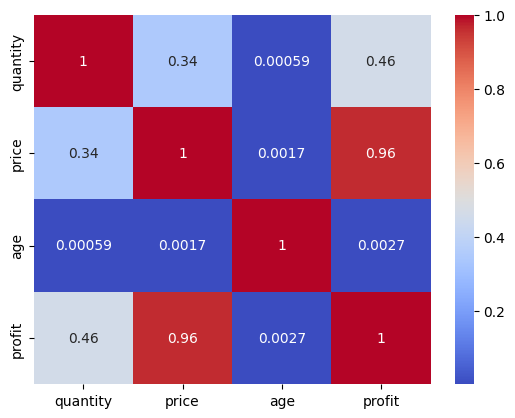

In [18]:
corr = notobj_types.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')

Comparing price and profit with scatterplot

In [19]:
px.scatter(data_frame=combined_data, x='price', y='profit', color='category', size='quantity')

Are you wondering what are the most sold items? Me too. Lets find out.

In [20]:
combined_data['category'].value_counts()

category
Clothing           34445
Cosmetics          15084
Food & Beverage    14761
Toys               10071
Shoes              10015
Technology          4995
Souvenir            4991
Books               4976
Name: count, dtype: int64

In [21]:
px.bar(combined_data['category'].value_counts(), height=400, color=combined_data['category'].unique(), text_auto=True)

Now let's find the most profitable item in each mall.

In [22]:
combined_data.pivot_table(index= "category", columns="shopping_mall", values="profit", aggfunc="sum")

shopping_mall    Cevahir AVM  Emaar Square Mall  Forum Istanbul  Istinye Park  \
category                                                                        
Books               44541.00           41995.80        42056.40      75689.40   
Clothing          5703920.64         5576986.80      5778040.40   11242497.20   
Cosmetics          321214.00          338901.10       353172.76     654788.64   
Food & Beverage     44010.45           40610.95        39078.56      85813.84   
Shoes             3243918.85         3087274.48      3327942.65    6631278.33   
Souvenir            29723.82           30943.74        32879.19      68632.23   
Technology        3051300.00         3094350.00      2516850.00    5436900.00   
Toys               204108.80          178769.92       199413.76     399687.68   

shopping_mall         Kanyon  Mall of Istanbul    Metrocity  Metropol AVM  \
category                                                                    
Books              162786.75         171861.60    125911.65      83718.90   
Clothing         22601725.52       22918009.84  17208987.84   11548278.72   
Cosmetics         1369550.78        1365606.76    990680.90     679753.88   
Food & Beverage    166413.37         171104.68    129761.53      88292.86   
Shoes            13309369.92       13451610.21   9513894.84    7143823.51   
Souvenir           126437.67         127434.72     94203.63      67869.78   
Technology       11944800.00       11828250.00   8604750.00    5327700.00   
Toys               789591.04         788372.48    605911.04     413271.04   

shopping_mall    Viaport Outlet  Zorlu Center  
category                                       
Books                  39632.40      45283.35  
Clothing             5604294.08    5686816.08  
Cosmetics             346423.20     366997.16  
Food & Beverage        41662.18      41934.14  
Shoes                3179700.66    3533200.79  
Souvenir               27319.17      28996.56  
Technology           3066000.00    2987250.00  
Toys                  199951.36     196044.80

In [23]:
px.bar(combined_data.pivot_table(index= "shopping_mall", columns="category", values="profit", aggfunc="sum"),barmode= "group")

**Conclusion**

This project successfully automated the data collection, cleaning, transformation, and reporting processes, resulting in a significant reduction in manual effort and increased efficiency. Reduced data processing time by 50%, allowing for quicker access to insights and more strategic decision-making.